Importing Required Libraries

In [ ]:
!pip -q install --upgrade pip
!pip -q install scikit-learn==1.4.2 mlflow pandas numpy matplotlib seaborn
# this will give errors however ok to proceed

Load Dataset

In [ ]:
import pandas as pd

# Load the Concrete Compressive Strength dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df = pd.read_excel(url)




Basic Inspection

In [ ]:
# Quick inspect
df.head()




,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
# 1. Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [ ]:
# Check column names
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

Rename columns based on below details

| Original Column Name                  | New Column Name    |
| ------------------------------------- | ------------------ |
| Cement (component 1)...               | `cement`           |
| Blast Furnace Slag (component 2)...   | `slag`             |
| Fly Ash (component 3)...              | `fly_ash`          |
| Water  (component 4)...               | `water`            |
| Superplasticizer (component 5)...     | `superplasticizer` |
| Coarse Aggregate  (component 6)...    | `coarse_agg`       |
| Fine Aggregate (component 7)...       | `fine_agg`         |
| Age (day)                             | `age`              |
| Concrete compressive strength(MPa...) | `strength`         |


In [ ]:
df.columns = [
    "cement", "slag", "fly_ash", "water", "superplasticizer",
    "coarse_agg", "fine_agg", "age", "strength"
]
df.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_agg',
       'fine_agg', 'age', 'strength'],
      dtype='object')

In [ ]:
# Check for duplicate rows
print("Duplicated rows: ",df.duplicated().sum())

Duplicated rows:  25


Drop duplicated rows

In [ ]:
df = df.drop_duplicates()

In [ ]:
# Basiccheck – no negative values?
if (df < 0).any().any():
    print("Warning: Negative values found")
else:
    print("All values are non-negative.")

All values are non-negative.


In [ ]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Data Visualization - Outliers
Box plots help identify potential outliers in the data.

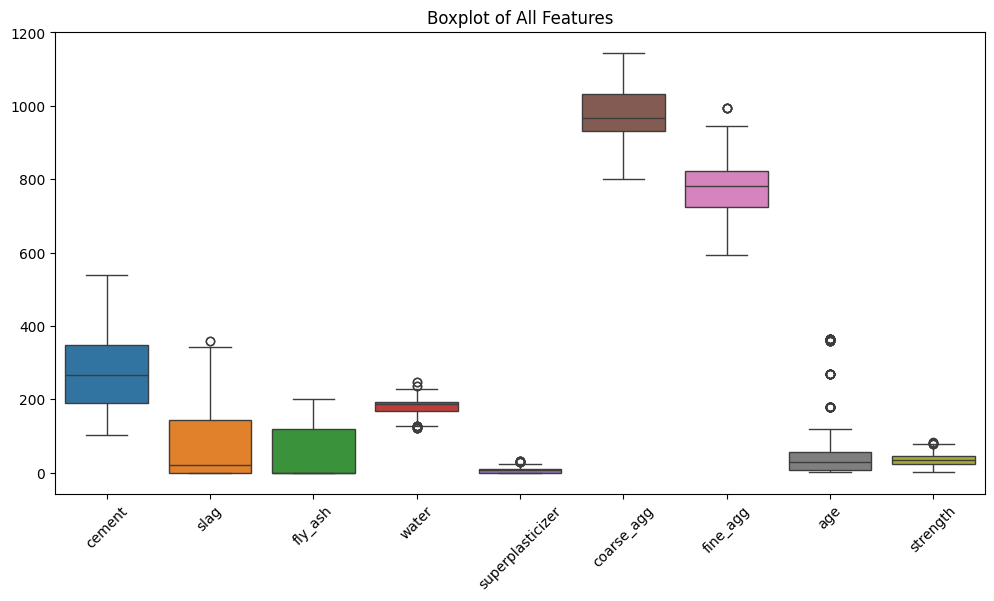

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of All Features")
plt.show()


Commentary

1. cement

Meaning: Amount of cement in kg per m³.

Range: 102 to 540

Boxplot: Slight right-skew, a few mild outliers at the high end.

Action:

✅ No missing values.

🟡 Optional: log-transform if using linear models (to reduce skew), but not strictly necessary.

❗High values may indicate mixes with high compressive strength; outliers could be meaningful.

2. slag (Blast Furnace Slag)

Meaning: Supplementary cementitious material (SCM), kg per m³.

Range: 0 to 359

Boxplot: Heavily skewed, lots of zeros.

Action:

✅ No missing values.

✅ Zeros are valid (some mixes don’t use slag).

🟡 Consider flagging “no slag” as a binary feature if models underperform.

🔁 Possibly scale or normalize due to high variance.

3. fly_ash

Meaning: Another SCM, kg per m³.

Range: 0 to 200

Boxplot: Similar to slag, sparse with zero-heavy skew.

Action:

Same as slag.

4. water

Meaning: Amount of water used in the mix (kg).

Range: 121–247

Boxplot: Pretty tight distribution, minor outliers.

Action:

✅ Fine as-is.

🟡 Might test as ratio: Water/Cement Ratio, which is a crucial engineering feature. Let's definitely create that later.

5. superplasticizer

Meaning: Chemical additive to improve workability.

Range: 0 to 32.2

Boxplot: Mostly 0–10, few high outliers.

Action:

✅ Zeros are valid (not all mixes use it).

🟡 Create binary feature: uses_superplasticizer = superplasticizer > 0

🔁 Might need normalization or log-scaling if you use linear models.

6. coarse_agg

Meaning: Coarse aggregate (kg/m³).

Range: 801–1145

Boxplot: Fairly even, a few points near edges.

Action:

✅ Clean.

🟢 No transformation needed unless you want to scale all features.

7. fine_agg

Meaning: Sand/silt aggregate (kg/m³).

Range: 594–993

Boxplot: Similar to coarse_agg.

Action:

✅ Fine as-is.

🟢 Might benefit from scaling if needed.

8. age

Meaning: Curing age in days.

Range: 1–365 (with many low values and a long tail)

Boxplot: Heavy right-skew, strong outliers.

Action:

🟡 Consider log transformation due to huge impact of early age (most strength gain is early).

🔁 Could also categorize into early (1–7 days), mid (7–28), and long-term (28+ days) as another angle.

9. strength (Target Variable)

Range: 2.3 – 82.6 MPa

Distribution: Slightly skewed, fairly broad.

Action:

✅ No need to transform unless regression model is underfitting due to heteroscedasticity.

🔍 Can revisit after model fit to analyze residuals.

### Feature Engineering - Domain-Specific Features
Create new features that improve model performance by using domain knowledge.

In [ ]:
import numpy as np

# Water-to-binder ratio (binder = cement + slag + fly_ash)
df['binder'] = df['cement'] + df['slag'] + df['fly_ash']
df['water_cement_ratio'] = df['water'] / df['binder']

# Binary flags for usage of admixtures
df['uses_slag'] = (df['slag'] > 0).astype(int)
df['uses_flyash'] = (df['fly_ash'] > 0).astype(int)
df['uses_superplasticizer'] = (df['superplasticizer'] > 0).astype(int)

# Log-transformed age (to deal with the skew)
df['log_age'] = np.log1p(df['age'])

# Drop helper column if desired
df.drop(columns='binder', inplace=True)

# Check the new columns
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength,water_cement_ratio,uses_slag,uses_flyash,uses_superplasticizer,log_age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30000,0,0,1,3.367296
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30000,0,0,1,3.367296
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48000,1,0,0,5.602119
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.48000,1,0,0,5.902633
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.58006,1,0,0,5.888878


In [ ]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength,water_cement_ratio,uses_slag,uses_flyash,uses_superplasticizer,log_age
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273,0.473139,0.537313,0.461692,0.623881,3.244973
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808,0.125500,0.498854,0.498779,0.484652,1.108951
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808,0.235073,0.000000,0.000000,0.000000,0.693147
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542,0.389522,0.000000,0.000000,0.000000,2.079442
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114,0.480000,1.000000,0.000000,1.000000,3.367296
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340,0.561264,1.000000,1.000000,1.000000,4.043051
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225,0.900000,1.000000,1.000000,1.000000,5.902633


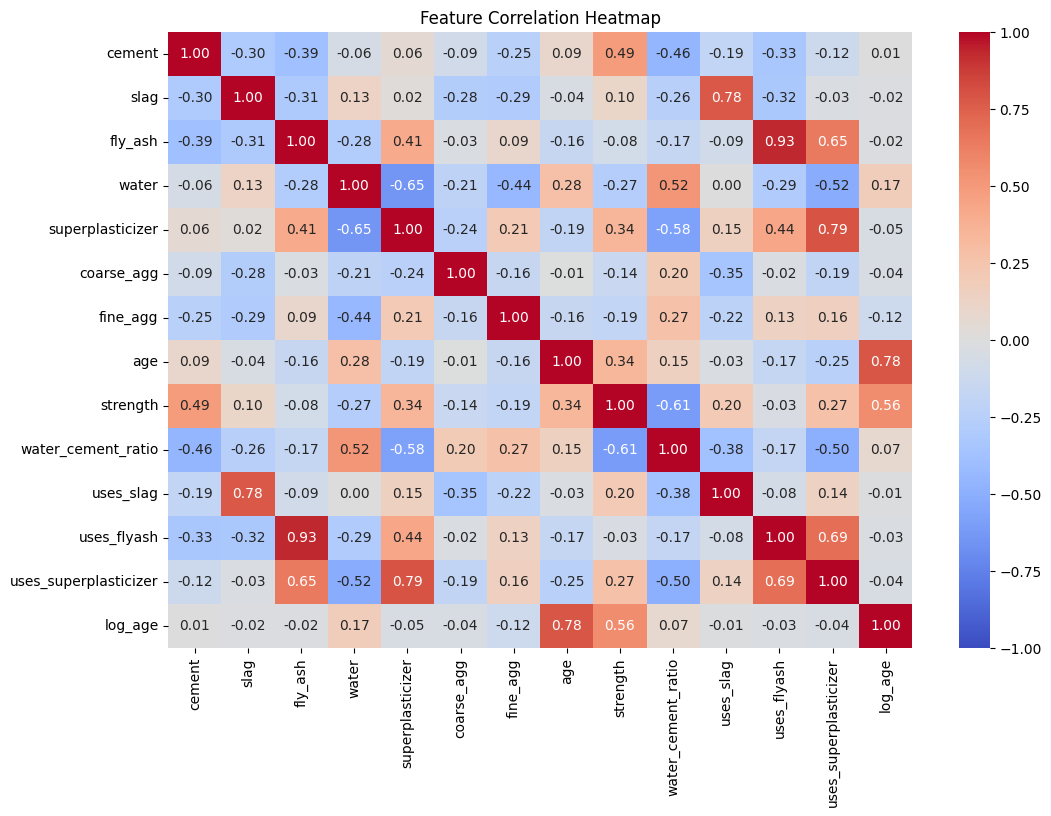

In [ ]:
#Let’s explore how  new and original features relate to the target (strength).

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#cementitious_material
# Total binder content = cement + slag + fly_ash
df['cementitious_material'] = df['cement'] + df['slag'] + df['fly_ash']

#This combines all the materials that contribute to the binding properties of concrete. Some mixtures may use more cement, others may substitute with slag or fly ash. Grouping them provides a holistic view of binder content, which directly affects compressive strength.

#agg_ratio
# Aggregate ratio = coarse aggregate / fine aggregate
df['agg_ratio'] = df['coarse_agg'] / df['fine_agg']

#This tells us the balance between large and small aggregate particles. A well-balanced ratio affects the density and compaction of concrete, influencing strength and durability. Extreme values may indicate poor mixture quality.

# binder_to_aggregate_ratio
# Ratio of binding material to total aggregates
df['binder_to_aggregate_ratio'] = df['cementitious_material'] / (df['coarse_agg'] + df['fine_agg'])

#This ratio can reflect how "rich" the mix is in terms of glue vs. filler. More binder compared to aggregates generally increases strength — up to a point.

# log-strength for later analysis or transformation
df['log_strength'] = np.log(df['strength'])

#In case your model residuals show heteroscedasticity (non-constant variance), log-transforming the target variable can help stabilize it. You can also use this in model variants later.

In [ ]:
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength,water_cement_ratio,uses_slag,uses_flyash,uses_superplasticizer,log_age,cementitious_material,agg_ratio,binder_to_aggregate_ratio,log_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30000,0,0,1,3.367296,540.0,1.538462,0.314685,4.381853
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30000,0,0,1,3.367296,540.0,1.560651,0.311958,4.125316
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48000,1,0,0,5.602119,475.0,1.569024,0.311271,3.695595
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.48000,1,0,0,5.902633,475.0,1.569024,0.311271,3.714859
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.58006,1,0,0,5.888878,331.0,1.185221,0.183491,3.790896


In [ ]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength,water_cement_ratio,uses_slag,uses_flyash,uses_superplasticizer,log_age,cementitious_material,agg_ratio,binder_to_aggregate_ratio,log_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273,0.473139,0.537313,0.461692,0.623881,3.244973,406.207264,1.277060,0.235437,3.433807
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808,0.125500,0.498854,0.498779,0.484652,1.108951,91.423606,0.185245,0.063481,0.547768
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808,0.235073,0.000000,0.000000,0.000000,0.693147,200.000000,0.858453,0.101523,0.846644
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542,0.389522,0.000000,0.000000,0.000000,2.079442,336.280000,1.121486,0.184850,3.158002
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114,0.480000,1.000000,0.000000,1.000000,3.367296,388.480000,1.283605,0.221833,3.520405
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340,0.561264,1.000000,1.000000,1.000000,4.043051,480.000000,1.358146,0.287687,3.803732
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225,0.900000,1.000000,1.000000,1.000000,5.902633,640.000000,1.874876,0.420776,4.414000


In [ ]:
#Polynomial Features
#cement_squared
df['cement_squared'] = df['cement'] ** 2

#Cement has a strong positive correlation with strength (~0.49). The impact of cement isn’t always linear — doubling cement doesn’t exactly double strength, so squaring can help capture that diminishing return.

#water_squared
df['water_squared'] = df['water'] ** 2

#water has a negative correlation with strength (~-0.27), and the effect may be non-linear. Too much water can sharply reduce strength — this feature helps the model capture that curve more accurately.

#age_squared
df['age_squared'] = df['age'] ** 2

#Strength increases with curing time but not linearly — there’s rapid early gain, then it slows. Squaring age helps the model represent this non-linear growth over time.

# wcr_squared (Water/Cement Ratio squared)
df['wcr_squared'] = df['water_cement_ratio'] ** 2

#Water/Cement Ratio is one of the most critical factors in concrete strength (negative correlation ~-0.61). This non-linear version helps when very high or very low W/C ratios have outsized effects.

#binder_squared (Total Binder squared)
df['binder_squared'] = df['cementitious_material'] ** 2

#Binder content influences strength, but higher levels can plateau or even reduce strength if improperly balanced. A squared feature lets us model this curved relationship.


# Add missing squared terms
df['slag_squared'] = df['slag'] ** 2
df['fly_ash_squared'] = df['fly_ash'] ** 2

# Add optional cubed terms for more complexity (only if needed)
df['cement_cubed'] = df['cement'] ** 3
df['slag_cubed'] = df['slag'] ** 3
df['fly_ash_cubed'] = df['fly_ash'] ** 3



In [ ]:
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength,water_cement_ratio,...,cement_squared,water_squared,age_squared,wcr_squared,binder_squared,slag_squared,fly_ash_squared,cement_cubed,slag_cubed,fly_ash_cubed
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30000,...,291600.00,26244.0,784,0.09000,291600.0,0.00,0.0,1.574640e+08,0.000,0.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30000,...,291600.00,26244.0,784,0.09000,291600.0,0.00,0.0,1.574640e+08,0.000,0.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48000,...,110556.25,51984.0,72900,0.23040,225625.0,20306.25,0.0,3.675995e+07,2893640.625,0.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.48000,...,110556.25,51984.0,133225,0.23040,225625.0,20306.25,0.0,3.675995e+07,2893640.625,0.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.58006,...,39441.96,36864.0,129600,0.33647,109561.0,17529.76,0.0,7.833173e+06,2320940.224,0.0


In [ ]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength,water_cement_ratio,...,cement_squared,water_squared,age_squared,wcr_squared,binder_squared,slag_squared,fly_ash_squared,cement_cubed,slag_cubed,fly_ash_cubed
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,...,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03,1.005000e+03,1.005000e+03
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273,0.473139,...,88511.196028,33606.053172,6160.907463,0.239595,173354.300199,12608.189358,7202.638864,3.136309e+07,2.522757e+06,9.886904e+05
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808,0.125500,...,65423.597949,7815.397759,20431.912025,0.126562,78075.680421,19976.449727,9529.661269,3.440180e+07,5.301996e+06,1.544992e+06
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808,0.235073,...,10404.000000,14823.062500,1.000000,0.055259,40000.000000,0.000000,0.000000,1.061208e+06,0.000000e+00,0.000000e+00
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542,0.389522,...,36358.862400,27758.892100,49.000000,0.151727,113084.238400,0.000000,0.000000,6.932908e+06,0.000000e+00,0.000000e+00
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114,0.480000,...,70225.000000,34484.490000,784.000000,0.230400,150916.710400,400.000000,0.000000,1.860962e+07,8.000000e+03,0.000000e+00
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340,0.561264,...,121801.000000,37225.843600,3136.000000,0.315017,230400.000000,20306.250000,13987.792900,4.250855e+07,2.893641e+06,1.654336e+06
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225,0.900000,...,291600.000000,61009.000000,133225.000000,0.810000,409600.000000,129168.360000,40040.010000,1.574640e+08,4.642311e+07,8.012006e+06


In [ ]:
# Interaction Terms
df['cement_wcr_interaction'] = df['cement'] * df['water_cement_ratio']
df['age_cement_interaction'] = df['age'] * df['cement']
df['age_slag_interaction'] = df['age'] * df['slag']
df['age_flyash_interaction'] = df['age'] * df['fly_ash']

# Ratio of Aggregates
df['agg_ratio'] = df['coarse_agg'] / df['fine_agg']

# Total Aggregate Content
df['total_aggregate'] = df['coarse_agg'] + df['fine_agg']

# Binder to Aggregate Ratio
df['binder_to_aggregate_ratio'] = df['cementitious_material'] / df['total_aggregate']

# Display the updated DataFrame with new features
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength,water_cement_ratio,...,slag_squared,fly_ash_squared,cement_cubed,slag_cubed,fly_ash_cubed,cement_wcr_interaction,age_cement_interaction,age_slag_interaction,age_flyash_interaction,total_aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30000,...,0.00,0.0,1.574640e+08,0.000,0.0,162.0,15120.0,0.0,0.0,1716.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30000,...,0.00,0.0,1.574640e+08,0.000,0.0,162.0,15120.0,0.0,0.0,1731.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48000,...,20306.25,0.0,3.675995e+07,2893640.625,0.0,159.6,89775.0,38475.0,0.0,1526.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.48000,...,20306.25,0.0,3.675995e+07,2893640.625,0.0,159.6,121362.5,52012.5,0.0,1526.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.58006,...,17529.76,0.0,7.833173e+06,2320940.224,0.0,115.2,71496.0,47664.0,0.0,1803.9


In [ ]:
df.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_agg',
       'fine_agg', 'age', 'strength', 'water_cement_ratio', 'uses_slag',
       'uses_flyash', 'uses_superplasticizer', 'log_age',
       'cementitious_material', 'agg_ratio', 'binder_to_aggregate_ratio',
       'log_strength', 'cement_squared', 'water_squared', 'age_squared',
       'wcr_squared', 'binder_squared', 'slag_squared', 'fly_ash_squared',
       'cement_cubed', 'slag_cubed', 'fly_ash_cubed', 'cement_wcr_interaction',
       'age_cement_interaction', 'age_slag_interaction',
       'age_flyash_interaction', 'total_aggregate'],
      dtype='object')

In [ ]:
#normalise the data
from sklearn.preprocessing import StandardScaler

# Define features to scale (exclude target + log target)
exclude_cols = ['strength', 'log_strength']
features_to_scale = [col for col in df.columns if col not in exclude_cols]

# Create scaler
scaler = StandardScaler()

# Fit and transform
scaled_features = scaler.fit_transform(df[features_to_scale])

# Turn back into DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale)

# Add the target columns back in (not scaled)
df_scaled['strength'] = df['strength'].values
df_scaled['log_strength'] = df['log_strength'].values

# Optional: show the head
df_scaled.head()


,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,water_cement_ratio,uses_slag,...,cement_cubed,slag_cubed,fly_ash_cubed,cement_wcr_interaction,age_cement_interaction,age_slag_interaction,age_flyash_interaction,total_aggregate,strength,log_strength
0,2.506120,-0.836469,-0.865363,-0.941128,-0.596903,0.846308,-1.204069,-0.280312,-1.380279,-1.077632,...,3.667357,-0.476050,-0.640251,0.831742,0.081318,-0.419047,-0.595071,-0.304005,79.986111,4.381853
1,2.506120,-0.836469,-0.865363,-0.941128,-0.596903,1.039755,-1.204069,-0.280312,-1.380279,-1.077632,...,3.667357,-0.476050,-0.640251,0.831742,0.081318,-0.419047,-0.595071,-0.157205,61.887366,4.125316
2,0.516534,0.818051,-0.865363,2.153088,-1.019442,-0.546505,-2.225242,3.518569,0.054698,0.927961,...,0.156955,0.069987,-0.640251,0.776541,3.512506,4.834298,-0.595071,-2.163480,40.269535,3.695595
3,0.516534,0.818051,-0.865363,2.153088,-1.019442,-0.546505,-2.225242,5.009865,0.054698,0.927961,...,0.156955,0.069987,-0.640251,0.776541,4.964287,6.682698,-0.595071,-2.163480,41.052780,3.714859
4,-0.767348,0.700784,-0.865363,0.465334,-1.019442,0.051889,0.657702,4.931375,0.852389,0.927961,...,-0.684314,-0.038083,-0.640251,-0.244661,2.672393,6.088957,-0.595071,0.556246,44.296075,3.790896


In [ ]:
#Train-Test Split

#Split the dataset into training and testing sets to evaluate performance properly.

from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=['strength', 'log_strength'])  # Features
y = df_scaled['strength']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train and evaluate baseline regressors to compare performance:

# Linear Regression (baseline)
# Decision Tree Regressor
# XGBoost Regressor


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R²: {r2:.3f}")

MSE: 41.24, R²: 0.862


In [ ]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree → MSE: {mse_dt:.2f}, R²: {r2_dt:.3f}")

Decision Tree → MSE: 32.73, R²: 0.890


In [ ]:
# XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost → MSE: {mse_xgb:.2f}, R²: {r2_xgb:.3f}")

XGBoost → MSE: 21.43, R²: 0.928


In [ ]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'XGBoost'],
    'MSE': [mse, mse_dt, mse_xgb],
    'R²': [r2, r2_dt, r2_xgb]
})

print(results)


               Model        MSE        R²
0  Linear Regression  41.241474  0.861758
1      Decision Tree  32.733050  0.890278
2            XGBoost  21.428828  0.928170
